In [1]:
#!pip install pycaret
#!pip install --upgrade PyCaret

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import numpy as np 
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
!pip install explainerdashboard

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
agri_data=pd.read_excel('/content/drive/MyDrive/Agri/FPData v1.2.xlsx')
agri_data.head()

,Date,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall
0,2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5,40.59
1,2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1,40.59
2,2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5,40.59
3,2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7,40.59
4,2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2,40.59


In [6]:
agri_data.dtypes

Date             datetime64[ns]
COMM_NAME                object
COMM_CODE                 int64
COMM_CATEGORY            object
COMM_WT                 float64
Monthly Price           float64
Rainfall                float64
dtype: object

In [7]:
# extract month and year from dates
agri_data['Month'] = [i.month for i in agri_data['Date']]
agri_data['year'] = [i.year for i in agri_data['Date']]
#agri_data['flag'] = pd.Series(np.where(agri_data['Date'] >= np.datetime64('2020-03-03'), 1, 0)) #flag for COVID-19
agri_data.head()

,Date,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall,Month,year
0,2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5,40.59,4,2011
1,2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1,40.59,4,2011
2,2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5,40.59,4,2011
3,2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7,40.59,4,2011
4,2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2,40.59,4,2011


In [8]:
agri_data.columns

Index(['Date', 'COMM_NAME', 'COMM_CODE', 'COMM_CATEGORY', 'COMM_WT',
       'Monthly Price', 'Rainfall', 'Month', 'year'],
      dtype='object')

In [9]:
target='Monthly Price'

In [10]:
#agri_data = agri_data.drop(columns=['COMM_CODE'])
#agri_data.columns

In [11]:
#agri_data = agri_data.drop(columns=['COMM_WT'])
#agri_data.columns

In [12]:
agri_data.set_index('Date', inplace=True)
agri_data.head()

,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall,Month,year
Date,,,,,,,,
2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5,40.59,4,2011
2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1,40.59,4,2011
2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5,40.59,4,2011
2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7,40.59,4,2011
2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2,40.59,4,2011


In [13]:
# Filtering out records in the dataframe with NULLs in Monthly Price
unknown_price_df=agri_data[agri_data['Monthly Price'].isna()]
# Filtering out records for June, 2021 to create a forecast dataframe
forecast_agri_df=unknown_price_df[(unknown_price_df['year']>2021) |((unknown_price_df['year']==2021) & (unknown_price_df['Month']>6))]
forecast_agri_index=forecast_agri_df.index  #indexes of the records in forecast dataframe
#Eliminating the records that need to be appear in forecast data from training data
agri_data=agri_data.drop(index=forecast_agri_index)

In [14]:
# split data into train-test set
train = agri_data[agri_data['year'] < 2020]
test = agri_data[agri_data['year'] >= 2020]
#check shape
train.shape, test.shape

((7140, 8), (1224, 8))

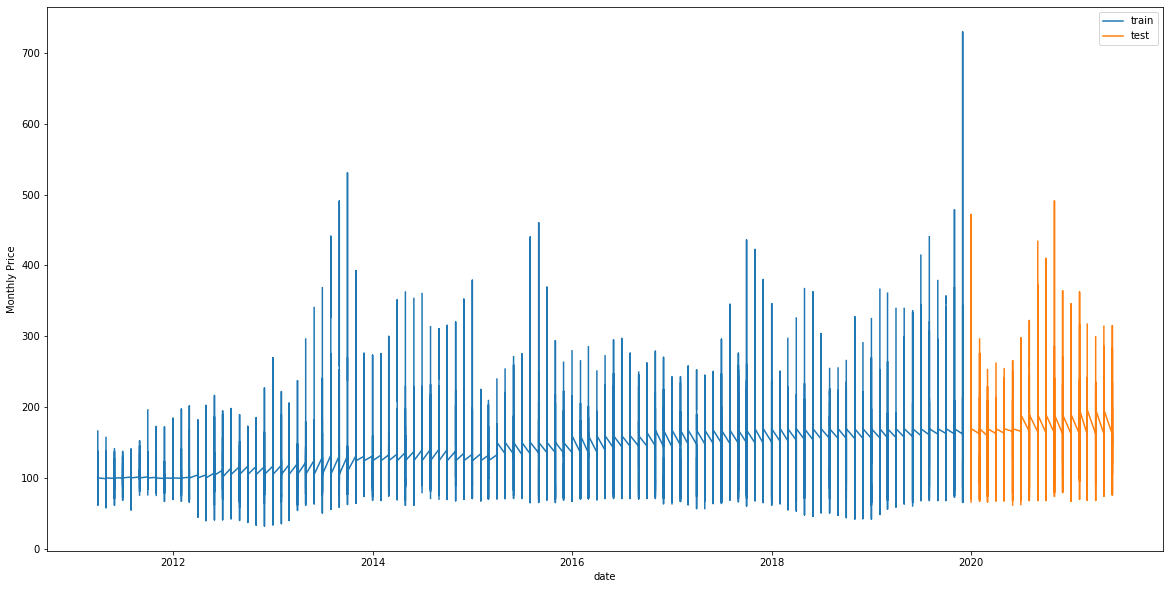

In [15]:
plt.figure(figsize=(20,10))
plt.xlabel('date')
plt.ylabel('Monthly Price')
plt.plot(train.index,train['Monthly Price'],label='train')
plt.plot(test.index,test['Monthly Price'],label='test')
plt.legend()
plt.show()

In [16]:
train.columns

Index(['COMM_NAME', 'COMM_CODE', 'COMM_CATEGORY', 'COMM_WT', 'Monthly Price',
       'Rainfall', 'Month', 'year'],
      dtype='object')

In [17]:
# Restart Runtime before running this cell
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [18]:
#original
reg = setup(data = train, 
             target = 'Monthly Price',
             numeric_imputation = 'mean',
             categorical_features = ['COMM_NAME','Month','year','COMM_CATEGORY'], use_gpu=True, combine_rare_levels = True, rare_level_threshold = 0.1,ignore_features=['COMM_CODE','COMM_WT'],
             silent = True,remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            data_split_shuffle = False,log_experiment = True,experiment_name='Midreview_1',log_plots = True,log_data = True)

,Description,Value
0,session_id,271
1,Target,Monthly Price
2,Original Data,"(7140, 8)"
3,Missing Values,True
4,Numeric Features,1
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4778, 57)"


In [19]:
#!pip install autoviz

In [20]:
#eda()

In [21]:
# returns best models - takes a little time to run
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,23.8803,1.203857e+03,33.8792,0.0752,0.2455,0.1956,0.368
lightgbm,Light Gradient Boosting Machine,23.2975,1.152777e+03,33.3408,0.0456,0.2399,0.1886,0.092
rf,Random Forest Regressor,23.6544,1.231045e+03,34.4112,-0.0004,0.2460,0.1910,1.449
br,Bayesian Ridge,25.2130,1.311914e+03,35.5610,-0.0553,0.2587,0.2060,0.051
ridge,Ridge Regression,25.2824,1.313938e+03,35.6223,-0.0668,0.2596,0.2065,0.022
lr,Linear Regression,25.3085,1.315143e+03,35.6489,-0.0709,0.2600,0.2067,0.057
huber,Huber Regressor,25.1761,1.433455e+03,36.7588,-0.0775,0.2626,0.1958,0.606
omp,Orthogonal Matching Pursuit,26.5529,1.446755e+03,37.1130,-0.0985,0.2691,0.2182,0.017
et,Extra Trees Regressor,25.5057,1.571700e+03,38.9452,-0.3176,0.2692,0.2046,1.438
dt,Decision Tree Regressor,26.0695,1.697667e+03,40.3561,-0.3812,0.2761,0.2089,0.031


In [22]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,23.2975,1.152777e+03,33.3408,0.0456,0.2399,0.1886,0.093
gbr,Gradient Boosting Regressor,23.8803,1.203857e+03,33.8792,0.0752,0.2455,0.1956,0.366
rf,Random Forest Regressor,23.6544,1.231045e+03,34.4112,-0.0004,0.2460,0.1910,1.281
br,Bayesian Ridge,25.2130,1.311914e+03,35.5610,-0.0553,0.2587,0.2060,0.042
ridge,Ridge Regression,25.2824,1.313938e+03,35.6223,-0.0668,0.2596,0.2065,0.037
lr,Linear Regression,25.3085,1.315143e+03,35.6489,-0.0709,0.2600,0.2067,0.048
huber,Huber Regressor,25.1761,1.433455e+03,36.7588,-0.0775,0.2626,0.1958,0.374
omp,Orthogonal Matching Pursuit,26.5529,1.446755e+03,37.1130,-0.0985,0.2691,0.2182,0.018
et,Extra Trees Regressor,25.5057,1.571700e+03,38.9452,-0.3176,0.2692,0.2046,1.414
lasso,Lasso Regression,28.6927,1.574125e+03,39.1072,-0.4341,0.2846,0.2415,0.037


In [23]:
#we create a model using light gbm
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.9049,596.8264,24.4300,-1.0400,0.1992,0.1457
1,16.3442,526.4468,22.9444,-0.0380,0.2122,0.1670
2,18.0115,622.2907,24.9458,0.1916,0.2374,0.1852
3,22.3375,1065.8534,32.6474,0.4844,0.2444,0.2033
4,26.0166,1483.0331,38.5102,0.2948,0.2569,0.2017
5,26.3004,1475.0310,38.4061,0.2586,0.2464,0.1798
6,24.0563,1173.4163,34.2552,0.1694,0.2289,0.1783
7,27.1494,1502.9994,38.7685,0.1948,0.2469,0.1982
8,27.6892,1588.6744,39.8582,-0.0021,0.2525,0.1950
9,30.1645,1493.2032,38.6420,-0.0572,0.2741,0.2319


In [24]:
tuned_lightgbm = tune_model(lightgbm) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.7639,489.9796,22.1355,-0.6747,0.2106,0.1538
1,17.3420,618.2025,24.8637,-0.2189,0.2278,0.1723
2,20.0161,761.5671,27.5965,0.0107,0.2610,0.2118
3,22.7202,1130.5394,33.6235,0.4531,0.2449,0.2011
4,25.6110,1378.8632,37.1330,0.3443,0.2474,0.2017
5,26.5994,1465.0120,38.2755,0.2636,0.2422,0.1869
6,24.5647,1188.9011,34.4804,0.1585,0.2325,0.1849
7,27.6010,1571.8103,39.6461,0.1579,0.2556,0.2087
8,28.2134,1568.9470,39.6099,0.0103,0.2592,0.1992
9,30.6044,1534.5059,39.1728,-0.0865,0.2793,0.2336


In [25]:
dashboard(lightgbm, display_format='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

In [26]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,34.5362,2678.8001,51.7571,0.0711,0.3126,0.2471


In [27]:
final_lightgbm = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [28]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.5, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=140, n_jobs=-1, num_leaves=4, objective=None,
              random_state=271, reg_alpha=0.3, reg_lambda=4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [29]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,30.2831,2066.5355,45.4592,0.2834,0.2854,0.2284


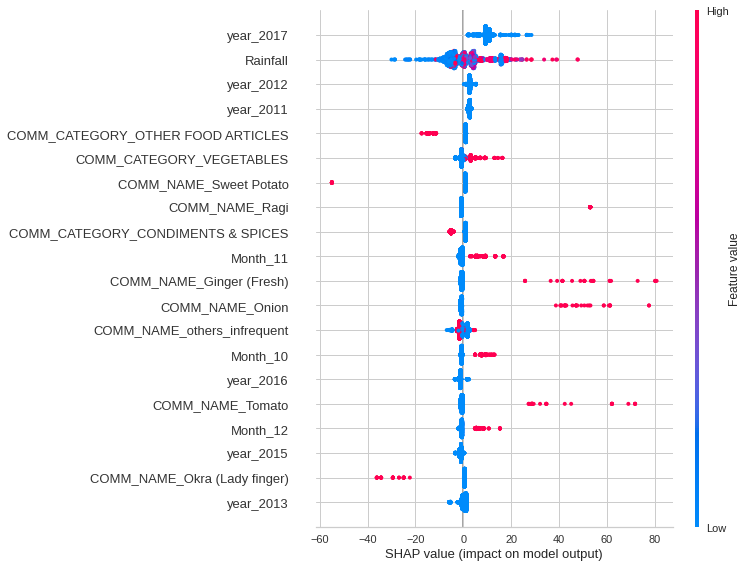

In [30]:
interpret_model(final_lightgbm)

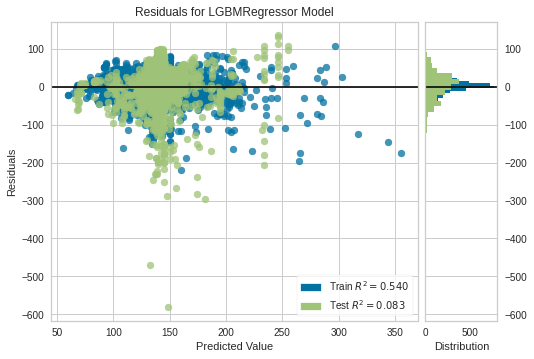

In [31]:
plot_model(lightgbm)

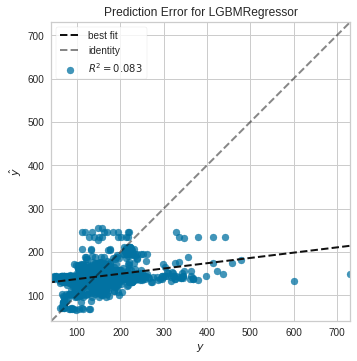

In [32]:
plot_model(lightgbm, plot = 'error')

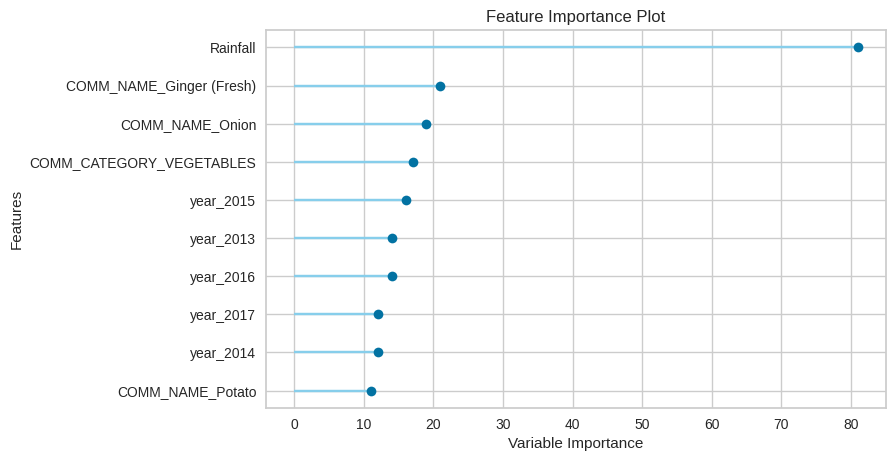

In [33]:
plot_model(tuned_lightgbm, plot='feature')

In [34]:
#Appending the test and forecast data
test=test.reset_index()
forecast_agri_df=forecast_agri_df.reset_index()
forecast_agri_df=forecast_agri_df.append(test,ignore_index=True)
#Sorting the forecast data by Date
forecast_agri_df=forecast_agri_df.sort_values(by='Date')
# Setting Date column as index to the forecast data
forecast_agri_df=forecast_agri_df.set_index('Date')

In [35]:
unseen_predictions = predict_model(final_lightgbm, data=forecast_agri_df)
unseen_predictions.head()
unseen_predictions.loc[unseen_predictions['Label'] < 0, 'Label'] = 0 #removing any negative values

In [36]:
## 22-01-2022: Changes by Anuraag
# Forecast Output from 2020-01-01 to 2023-03-01
# Label column denotes the forecasted prices
unseen_predictions[['COMM_NAME','COMM_CATEGORY','Monthly Price','Label']]

,COMM_NAME,COMM_CATEGORY,Monthly Price,Label
Date,,,,
2020-01-01,Sugarcane,OTHER FOOD ARTICLES,169.5,132.869477
2020-01-01,Apple,FRUITS,91.6,148.528807
2020-01-01,Orange,FRUITS,111.6,148.528807
2020-01-01,Cashew nut,FRUITS,163.7,148.528807
2020-01-01,Coconut (Fresh),FRUITS,210.7,148.528807
...,...,...,...,...
2023-03-01,Tomato,VEGETABLES,NaN,204.683695
2023-03-01,Peas (Green),VEGETABLES,NaN,135.916748
2023-03-01,Tapioca,VEGETABLES,NaN,147.787901


In [37]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(time[start:end], series[start:end], format,label=i)
    plt.xlabel("Date")
    plt.ylabel("Monthly Price (Rupees)")
    plt.legend()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

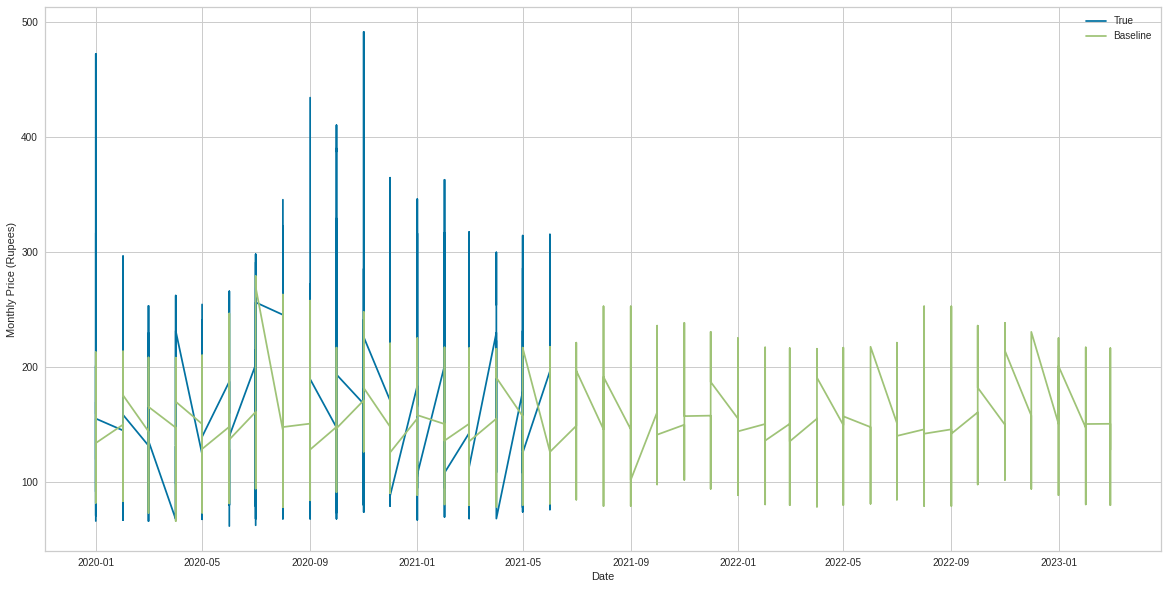

In [39]:
plt.figure(figsize=(20,10))
plot_series(forecast_agri_df.index, forecast_agri_df['Monthly Price'],"True")
#plot_series(train['ds'],train['y'])
plot_series(forecast_agri_df.index, unseen_predictions['Label'],"Baseline")


In [40]:
gbr = create_model('gbr', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
br=create_model('br', verbose = False)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
/usr/local/lib/python3.7/dist-packages/explainerdashboard/dashboard_components/overview_components.py in update_whatif_inputs(index='2018-06-01')
    814             if index is None or not self.explainer.index_exists(index):
    815                 raise PreventUpdate
--> 816             X_row = self.explainer.get_X_row(index, merge=True)[self.explainer.columns_ranked_by_shap()]
        X_row = undefined
        global self.explainer.get_X_row = undefined
        index = '2018-06-01'
        global merge = undefined
        global self.explainer.columns_ranked_by_shap = undefined
    817             return X_row.values[0].tolist()
    818 

/usr/local/lib/python3.7/dist-packages/explainerdashboard/explainers.py in get_X_row(
    self=<explainerdashboard.explainers.RegressionExplainer object>,
    index='2018-06-01',
    merge=True
)
  

In [41]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.0406,407.1863,20.1789,-0.3918,0.1831,0.1408
1,17.4196,553.0787,23.5176,-0.0905,0.2159,0.1790
2,18.5958,670.6243,25.8964,0.1288,0.2492,0.2000
3,22.5640,1055.3042,32.4854,0.4895,0.2458,0.2067
4,25.5348,1376.2267,37.0975,0.3456,0.2511,0.2016
5,25.3467,1370.6005,37.0216,0.3111,0.2374,0.1743
6,22.6535,1115.3265,33.3965,0.2106,0.2181,0.1640
7,25.9644,1422.8032,37.7201,0.2378,0.2410,0.1873
8,26.7671,1435.1094,37.8828,0.0947,0.2426,0.1839
9,29.4373,1469.6970,38.3366,-0.0406,0.2702,0.2178


In [42]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.7639,489.9796,22.1355,-0.6747,0.2106,0.1538
1,17.3420,618.2025,24.8637,-0.2189,0.2278,0.1723
2,20.0161,761.5671,27.5965,0.0107,0.2610,0.2118
3,22.7202,1130.5394,33.6235,0.4531,0.2449,0.2011
4,25.6110,1378.8632,37.1330,0.3443,0.2474,0.2017
5,26.5994,1465.0120,38.2755,0.2636,0.2422,0.1869
6,24.5647,1188.9011,34.4804,0.1585,0.2325,0.1849
7,27.6010,1571.8103,39.6461,0.1579,0.2556,0.2087
8,28.2134,1568.9470,39.6099,0.0103,0.2592,0.1992
9,30.6044,1534.5059,39.1728,-0.0865,0.2793,0.2336


In [43]:
tuned_br = tune_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.4477,500.6263,22.3747,-0.7111,0.2132,0.1639
1,19.2310,767.3446,27.7010,-0.5130,0.2538,0.1886
2,19.9911,731.1848,27.0404,0.0502,0.2628,0.2174
3,26.0173,1575.3312,39.6904,0.2379,0.2748,0.2282
4,28.0169,1763.8691,41.9984,0.1612,0.2721,0.2182
5,27.8127,1614.6179,40.1823,0.1884,0.2540,0.1975
6,24.2282,1193.9289,34.5533,0.1549,0.2327,0.1801
7,28.6877,1622.3526,40.2784,0.1309,0.2604,0.2161
8,28.3016,1545.1396,39.3083,0.0253,0.2605,0.2010
9,33.3958,1804.7474,42.4823,-0.2778,0.3025,0.2487


In [44]:
blend_specific = blend_models(estimator_list = [tuned_lightgbm,tuned_gbr,tuned_br])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.8027,434.8186,20.8523,-0.4862,0.1949,0.1465
1,16.6792,582.1998,24.1288,-0.1479,0.2210,0.1674
2,18.8392,670.5729,25.8954,0.1289,0.2516,0.2038
3,23.1174,1179.5699,34.3449,0.4294,0.2485,0.2070
4,25.9708,1446.6059,38.0343,0.3121,0.2515,0.2043
5,26.1016,1434.7629,37.8783,0.2788,0.2407,0.1831
6,23.1816,1109.4851,33.3089,0.2147,0.2230,0.1724
7,26.7282,1487.4748,38.5678,0.2031,0.2476,0.1990
8,27.4558,1478.0646,38.4456,0.0676,0.2509,0.1925
9,30.7503,1556.0124,39.4463,-0.1017,0.2803,0.2305


In [45]:
predict_model(blend_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,34.0994,2601.9924,51.0097,0.0977,0.3078,0.2438


,Rainfall,COMM_NAME_Arhar,COMM_NAME_Bajra,COMM_NAME_Barley,COMM_NAME_Beans,COMM_NAME_Bitter gourd,COMM_NAME_Bottle gourd,COMM_NAME_Brinjal,COMM_NAME_Cabbage,COMM_NAME_Carrot,COMM_NAME_Cucumber,COMM_NAME_Ginger (Fresh),COMM_NAME_Gram,COMM_NAME_Jowar,COMM_NAME_Maize,COMM_NAME_Masur,COMM_NAME_Moong,COMM_NAME_Okra (Lady finger),COMM_NAME_Onion,COMM_NAME_Paddy,COMM_NAME_Peas/Chawali,COMM_NAME_Pointed gourd,COMM_NAME_Potato,COMM_NAME_Pumpkin,COMM_NAME_Radish,COMM_NAME_Ragi,COMM_NAME_Rajma,COMM_NAME_Sweet Potato,COMM_NAME_Tapioca,COMM_NAME_Tomato,COMM_NAME_Urad,COMM_NAME_Wheat,COMM_NAME_others_infrequent,COMM_CATEGORY_CEREALS,COMM_CATEGORY_CONDIMENTS & SPICES,COMM_CATEGORY_FRUITS,COMM_CATEGORY_OTHER FOOD ARTICLES,COMM_CATEGORY_PULSES,COMM_CATEGORY_VEGETABLES,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_others_infrequent,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,Monthly Price,Label
0,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,112.800003,130.555851
1,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,159.899994,136.213140
2,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,107.099998,136.213140
3,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140.600006,136.213140
4,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,126.500000,136.213140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,156.399994,138.195504
2040,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,131.800003,133.543585
2041,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,95.099998,133.543585
2042,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.199997,133.543585


In [46]:
final_model = finalize_model(blend_specific)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [47]:
unseen_predictions_2 = predict_model(final_model, data=forecast_agri_df, round=0)
unseen_predictions_2.loc[unseen_predictions_2['Label'] < 0, 'Label'] = 0
unseen_predictions_2.head()

,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall,Month,year,Label
Date,,,,,,,,,
2020-01-01,Sugarcane,1101060004,OTHER FOOD ARTICLES,0.58142,169.5,24.36,1,2020,127.538864
2020-01-01,Apple,1101020203,FRUITS,0.07505,91.6,24.36,1,2020,143.750625
2020-01-01,Orange,1101020204,FRUITS,0.12653,111.6,24.36,1,2020,143.750625
2020-01-01,Cashew nut,1101020205,FRUITS,0.06583,163.7,24.36,1,2020,143.750625
2020-01-01,Coconut (Fresh),1101020206,FRUITS,0.07873,210.7,24.36,1,2020,143.750625


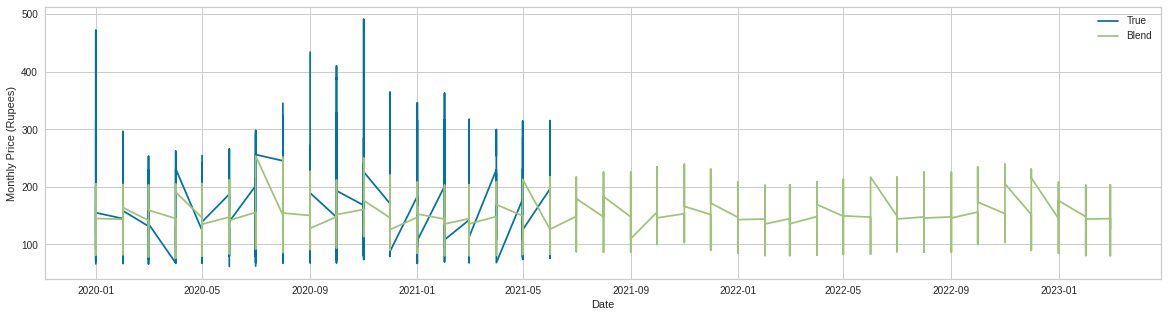

In [48]:
plt.figure(figsize=(20,5))
plot_series(forecast_agri_df.index, forecast_agri_df['Monthly Price'],"True")
plot_series(forecast_agri_df.index, unseen_predictions_2['Label'],'Blend')

In [49]:
stack_1 = stack_models([tuned_lightgbm,tuned_gbr,tuned_br])
predict_model(stack_1);
final_stack_1 = finalize_model(stack_1)
unseen_predictions_3 = predict_model(final_stack_1, data=forecast_agri_df, round=1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.190624e+02,1.456667e+04,1.206925e+02,-4.878890e+01,0.7971,1.224400e+00
1,4.464850e+01,3.955737e+03,6.289460e+01,-6.799500e+00,0.4506,4.713000e-01
2,1.813950e+01,6.316591e+02,2.513280e+01,1.795000e-01,0.2432,1.930000e-01
3,2.258360e+01,1.184078e+03,3.441040e+01,4.272000e-01,0.2411,1.923000e-01
4,3.138240e+01,1.914747e+03,4.375780e+01,8.950000e-02,0.3155,2.307000e-01
5,2.992030e+01,1.953084e+03,4.419370e+01,1.830000e-02,0.2832,1.881000e-01
6,2.963810e+01,1.710344e+03,4.135630e+01,-2.106000e-01,0.2883,1.986000e-01
7,3.509100e+01,2.457284e+03,4.957100e+01,-3.164000e-01,0.3299,2.290000e-01
8,5.369200e+01,4.028405e+03,6.346970e+01,-1.541100e+00,0.4734,3.379000e-01
9,1.562316e+10,3.933369e+20,1.983272e+10,-2.784971e+17,15.0120,1.221559e+08


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,58.7041,5743.6941,75.7872,-0.9916,0.5397,0.3598


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

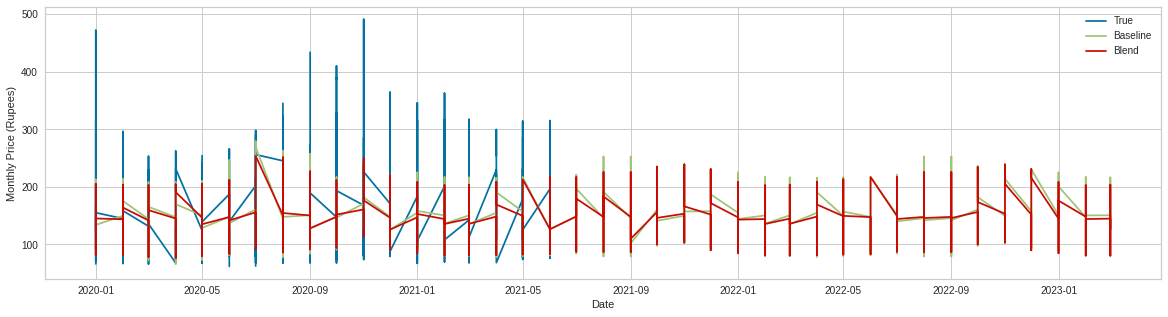

In [50]:
plt.figure(figsize=(20,5))
plot_series(forecast_agri_df.index, forecast_agri_df['Monthly Price'],"True")
plot_series(forecast_agri_df.index, unseen_predictions['Label'],'Baseline')
plot_series(forecast_agri_df.index, unseen_predictions_2['Label'],'Blend')

In [51]:
!pip install mlflow ui
!pip install mlflow
# run mlflow server (notebook)
#!mlflow ui

In [52]:
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=271, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [53]:
#!pip install evidently

In [54]:
#!pip install mlflow --quiet
#!pip install pyngrok --quiet

In [55]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

In [56]:
!pip install pyngrok

In [57]:
#Check whether MLFlow is installed or not
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download...
  azureml      Serve models on Azure ML.
  db           Commands for managing an MLflow...
  deployments  Deploy MLflow models to custom...
  experiments  Manage experiments.
  gc           Permanently delete runs in the
               `deleted` lifecycle stage.

  models       Deploy MLflow models locally.
  run          Run an MLflow project from the...
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.
  ui           Launch the MLflow tracking UI
               for...


In [58]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "232s9CSB1KwwGMdmyS7xz1Lxn3o_maAhMo1uwUiDvhg6QR5w"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

t=2022-01-27T17:28:57+0000 lvl=eror msg="failed to auth" obj=tunnels.session err="Your account is limited to 1 simultaneous ngrok client session.\nActive ngrok client sessions in region 'us':\n  - ts_24H2V7D58VKMq6s5Z2MDCP2jKzu (35.245.142.88)\r\n\r\nERR_NGROK_108\r\n"


PyngrokNgrokError: ignored

In [ ]:
!mlflow ui